In [2]:
import pandas as pd
import numpy as np

%store -r NSLFlows
%store -r BNDFlows
%store -r NEMFlows
%store -r ELCFlows
%store -r IF1Flows
%store -r IF2Flows
%store -r MEWFlows

In [3]:
ImportData = pd.DataFrame({"North Sea Link": NSLFlows.iloc[:,1]})
ImportData["BritNed"] = BNDFlows.iloc[:,1]
ImportData["Nemo Link"] = NEMFlows.iloc[:,1]
ImportData["ElecLink"] = ELCFlows.iloc[:,1]
ImportData["IFA"] = IF1Flows.iloc[:,1]
ImportData["IFA 2"] = IF2Flows.iloc[:,1]
ImportData["Moyle and East-West"] = MEWFlows.iloc[:,1]

ImportData["Date"] = pd.date_range(start="1/1/2021", periods=730, freq="D")

NewOrder = ["Date", "North Sea Link", "BritNed", "Nemo Link", "ElecLink", "IFA", "IFA 2", "Moyle and East-West"]

ImportData = ImportData.reindex(columns=NewOrder)

In [4]:
ImportData = ImportData.replace(np.NaN, 0)

ImportData["Total Imports"] = (ImportData["North Sea Link"] + ImportData["BritNed"]
                                     + ImportData["Nemo Link"] + ImportData["ElecLink"]
                                     + ImportData["IFA"] + ImportData["IFA 2"]
                                     + ImportData["Moyle and East-West"])
print(ImportData.to_string())

          Date  North Sea Link   BritNed  Nemo Link  ElecLink      IFA    IFA 2  Moyle and East-West  Total Imports
0   2021-01-01             0.0      6.00   24029.25       0.0      0.0      0.0               9007.0       33042.25
1   2021-01-02             0.0      0.00   23605.25       0.0      0.0      0.0                765.0       24370.25
2   2021-01-03             0.0      0.00   23762.25       0.0      0.0      0.0               1095.0       24857.25
3   2021-01-04             0.0     17.00   21801.50       0.0      0.0      0.0                726.0       22544.50
4   2021-01-05             0.0     11.00   14150.00       0.0      0.0      0.0                140.0       14301.00
5   2021-01-06             0.0     14.00   19651.50       0.0      0.0      0.0                422.0       20087.50
6   2021-01-07             0.0     15.00   22638.00       0.0      0.0      0.0               2739.0       25392.00
7   2021-01-08             0.0     16.00   19521.00       0.0      0.0  

In [23]:
a = sum(ImportData["Total Imports"])
a

41731511.25

In [5]:
ExportData = pd.DataFrame({"North Sea Link": NSLFlows.iloc[:,2]})
ExportData["BritNed"] = BNDFlows.iloc[:,2]
ExportData["Nemo Link"] = NEMFlows.iloc[:,2]
ExportData["ElecLink"] = ELCFlows.iloc[:,2]
ExportData["IFA"] = IF1Flows.iloc[:,2]
ExportData["IFA 2"] = IF2Flows.iloc[:,2]
ExportData["Moyle and East-West"] = MEWFlows.iloc[:,2]

ExportData["Date"] = pd.date_range(start="1/1/2021", periods=730, freq="D")

NewOrder = ["Date", "North Sea Link", "BritNed", "Nemo Link", "ElecLink", "IFA", "IFA 2", "Moyle and East-West"]

ExportData = ExportData.reindex(columns=NewOrder)
ExportData

,Date,North Sea Link,BritNed,Nemo Link,ElecLink,IFA,IFA 2,Moyle and East-West
0,2021-01-01,NaN,0.00,0.00,NaN,NaN,NaN,63.0
1,2021-01-02,NaN,4.00,0.00,NaN,NaN,NaN,1263.0
2,2021-01-03,NaN,3.00,0.00,NaN,NaN,NaN,2940.0
3,2021-01-04,NaN,0.00,0.00,NaN,NaN,NaN,6429.0
4,2021-01-05,NaN,2.00,0.00,NaN,NaN,NaN,9081.0
...,...,...,...,...,...,...,...,...
725,2022-12-27,828.0,1814.75,3057.50,NaN,299.0,0.0,NaN
726,2022-12-28,8779.0,3466.50,2548.75,NaN,1316.0,950.0,NaN
727,2022-12-29,12906.0,3978.00,1268.50,NaN,5611.0,1137.0,NaN
728,2022-12-30,9851.0,7499.00,5346.25,NaN,4933.0,4229.0,NaN


In [6]:
ExportData = ExportData.replace(np.NaN, 0)

ExportData["Total Exports"] = (ExportData["North Sea Link"] + ExportData["BritNed"]
                                     + ExportData["Nemo Link"] + ExportData["ElecLink"]
                                     + ExportData["IFA"] + ExportData["IFA 2"]
                                     + ExportData["Moyle and East-West"])
print(ExportData.to_string())

          Date  North Sea Link   BritNed  Nemo Link  ElecLink      IFA    IFA 2  Moyle and East-West  Total Exports
0   2021-01-01             0.0      0.00       0.00       0.0      0.0      0.0                 63.0          63.00
1   2021-01-02             0.0      4.00       0.00       0.0      0.0      0.0               1263.0        1267.00
2   2021-01-03             0.0      3.00       0.00       0.0      0.0      0.0               2940.0        2943.00
3   2021-01-04             0.0      0.00       0.00       0.0      0.0      0.0               6429.0        6429.00
4   2021-01-05             0.0      2.00       0.00       0.0      0.0      0.0               9081.0        9083.00
5   2021-01-06             0.0      0.00       0.00       0.0      0.0      0.0               2804.0        2804.00
6   2021-01-07             0.0      0.00       0.00       0.0      0.0      0.0               2152.0        2152.00
7   2021-01-08             0.0      1.00     829.50       0.0      0.0  

In [27]:
b = sum(ExportData["Total Exports"])
b

22297748.5

(18591.55, 19393.45)


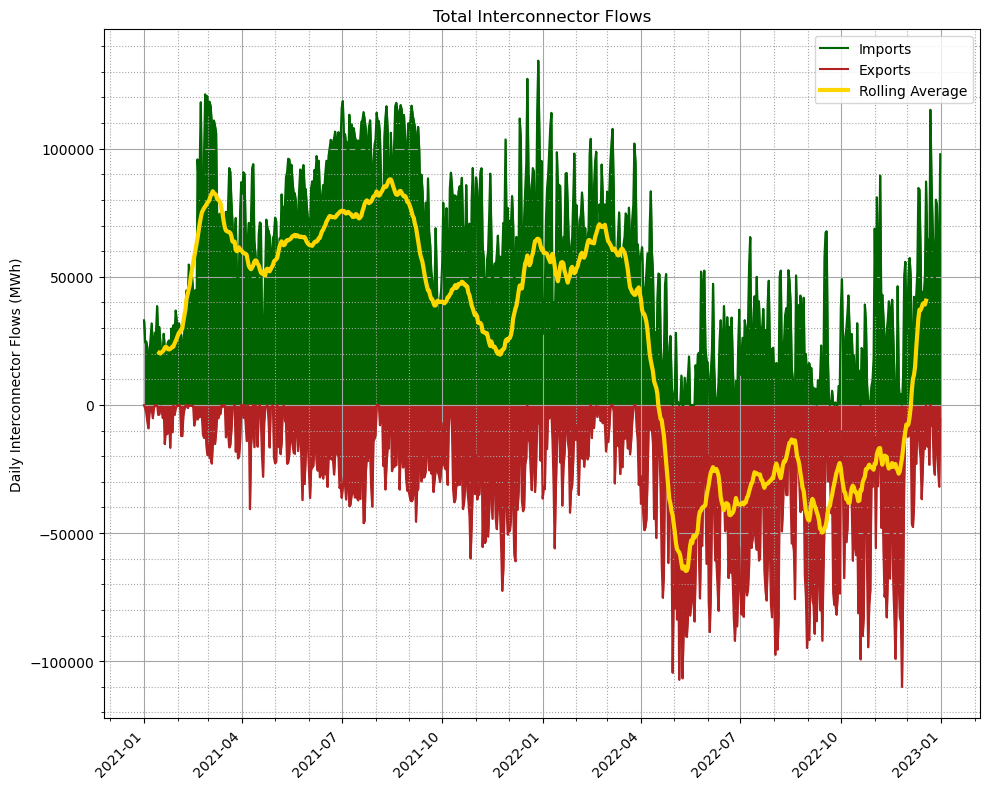

In [7]:
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)

plt.title('Total Interconnector Flows')
plt.ylabel('Daily Interconnector Flows (MWh)')

Mean = (ImportData["Total Imports"] - ExportData["Total Exports"])/math.sqrt(2)
Sum = ImportData["Total Imports"] - ExportData["Total Exports"]

ax.plot(ImportData["Date"], ImportData["Total Imports"], color="darkgreen", label="Imports")
ax.plot(ExportData["Date"], -ExportData["Total Exports"], color="firebrick", label="Exports")
ax.plot(ImportData["Date"], Sum.rolling(28,  center=True).mean(), linewidth = 3, color = "gold", label="Rolling Average")
#ax.plot(ImportData["Date"], Mean, label="RMS", color='black')


plt.legend()
plt.grid(visible=True, which='major', color='0.65', linestyle='-')
plt.grid(visible=True, which='minor', color='0.65', linestyle=':')

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

fig.autofmt_xdate()

print(ax.get_xlim())

plt.tick_params(axis='x', which='major', labelsize=10)
plt.xticks(rotation=45, ha='right')
#plt.xlim(18591.55, 19379.8)
plt.tight_layout()

plt.fill_between(ImportData["Date"], ImportData["Total Imports"], color="darkgreen")
plt.fill_between(ExportData["Date"], -ExportData["Total Exports"], color="firebrick")

ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter(""))

plt.show()